# Multi-Asset Portfolio Construction

A **well-diversified multi-asset portfolio** anchored in Indian markets (plus non-equity exposures) should include tickers/ETFs across multiple asset classes:  
- Equities across sectors (large, mid, small caps)  
- Debt (government/corporate)  
- Gold/commodities  
- Possibly international exposures  

Below are suggested tickers and ETFs in India (and beyond). You can pick a subset based on **liquidity, risk appetite**.

---

## Indian-Market Tickers / ETFs / Indices for Diversification

### Equity / Sectoral Exposures (India)

Choose representative **large-cap stocks** or **sectoral ETFs/indices** across sectors:  
Financials, IT, Consumer, Healthcare, Industrials, Energy, Utilities, etc.

#### Nifty Sectoral Indices
- Nifty Auto  
- Nifty Bank  
- Nifty Chemicals  
- Nifty Financial Services  
- Nifty FMCG  
- Nifty Healthcare  
- Nifty IT  
- Nifty Oil & Gas  
- Nifty Realty  
- Nifty Metal  
- Nifty PSU Bank  
- Nifty Private Bank  

#### Indian ETFs
- **ICICI B22 (Bharat 22 ETF)** — broad exposure ETF in India  
- **CPSE ETF** — exposure to central public sector enterprises  
- **Nippon India ETF / BeES series** — e.g., Nifty 50 BeES, Nifty Bank BeES  
- **Sector-specific ETFs** — e.g., Nippon India ETF Nifty IT  

#### Direct Stocks
- **Reliance Industries** (diversified conglomerate)  
- **TCS, Infosys, HCLTech** (IT sector)  
- **HDFC Bank, ICICI Bank, Kotak Bank** (financials)  
- **Hindustan Unilever, Nestle India** (FMCG)  
- **Sun Pharma, Dr Reddy’s** (pharma/healthcare)  
- **Larsen & Toubro** (industrial/infrastructure)  
- **NTPC, Power Grid** (utilities/energy)  
- **ONGC, Indian Oil** (oil & gas)  

✅ To get a workable equity portfolio: pick **5–8 exposures** representing major sectors.

---

## Non-Equity / Fixed Income / Other Assets

To diversify beyond equities:  

- **Bharat Bond ETFs** — govt/corporate bond ETFs in India (e.g., EBBETF0425, EBBETF0430)  
- **Gold ETFs** — e.g., Axis Gold ETF (AXISGOLD)  
- **Debt ETFs / Liquid / Short-term Debt ETFs** — e.g., Liquid ETF, Long Term Gilt ETF  
- **International / Global Equity ETFs** (if broker supports) — e.g., MSCI India ETFs, U.S./Developed markets ETFs  

---

# Tangency Portfolio and the Capital Market Line (CML)

The **tangency portfolio** is the optimal portfolio of risky assets, located at the point where the **Capital Market Line (CML)** is tangent to the **efficient frontier**.  
This portfolio represents the combination with the **highest Sharpe ratio**, delivering the maximum excess return per unit of risk.

---

## Key Concepts

- **Efficient Frontier**  
  The set of all portfolios that provide either:  
  - the highest expected return for a given level of risk, or  
  - the lowest risk for a given expected return.  

- **Capital Market Line (CML)**  
  A line that represents the risk-return trade-off for portfolios that combine a risk-free asset with the optimal risky portfolio.  

- **Tangency Point**  
  The point where the CML touches the efficient frontier.  

- **Tangency Portfolio**  
  The portfolio of risky assets located at the tangency point.

---

## Why It's Optimal

1. **Maximum Risk-Adjusted Return**  
   - The tangency portfolio maximizes the **Sharpe ratio**, defined as excess return per unit of risk (volatility).  

2. **Best Risky Portfolio**  
   - By combining the **risk-free asset** with the **tangency portfolio**, investors can achieve any desired risk-return profile along the CML.  
   - This creates the **overall optimal portfolio** tailored to an investor’s risk preference.

---

## Capital Allocation Line (CAL) vs. Capital Market Line (CML)

The **CAL** and **CML** are related but not identical.  
- A **CAL** can be drawn for *any risky asset or portfolio* combined with the risk-free asset.  
- The **CML** is a special case: it uses the **market portfolio** (the fully diversified portfolio of all risky assets).

---

### Capital Allocation Line (CAL)

- **Definition**: Graphical representation of the risk-return trade-offs of investing in a **risk-free asset** and a **specific risky asset/portfolio**.  
- **Versatility**: Many different CALs can exist, depending on the chosen risky asset/portfolio.  
- **Slope**: Equal to the **Sharpe ratio** of the selected risky asset/portfolio.  
- **Purpose**: Helps investors visualize possible outcomes for a particular investment strategy.  

---

### Capital Market Line (CML)

- **Definition**: A **unique CAL** that connects the risk-free asset to the **market portfolio**.  
- **Unique**: Only one CML exists, since there is only one market portfolio.  
- **Slope**: Equal to the **Sharpe ratio of the market portfolio**.  
- **Concept**: Represents the **best possible risk-return trade-off** available to all investors.  
- **Intercept**: The CML intersects the y-axis at the **risk-free rate**.  

---


In [ ]:
!pip install PyPortfolioOpt --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 5.2 MB/s eta 0:00:00


---

## Practical Tips & Caveats

- **Estimation error**: Historical returns are noisy. Use shrinkage, robust estimators.  
- **Constraints**: Apply long-only, weight limits, and turnover constraints.  
- **Frequency**: Match return/covariance estimation with data (daily → 252).  
- **Risk-free rate**: Use relevant rate (e.g., 3-month T-bill yield).  
- **Lookahead bias**: Use train/test or rolling windows to validate performance.  

---

In [ ]:
"""
Efficient Frontier + Tangency portfolio with PyPortfolioOpt and Yahoo Finance

How to run:
1) pip install yfinance pyportfolioopt pandas numpy matplotlib
2) python efficient_frontier_pyportfolioopt.py

Change tickers, date range, or risk_free_rate below as desired.
"""

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pypfopt import expected_returns, risk_models, EfficientFrontier, plotting, objective_functions


[*********************100%***********************]  12 of 12 completed
/tmp/ipython-input-1704512150.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(t, (asset_vols[i], asset_returns[i]), xytext=(6, -6), textcoords='offset points')


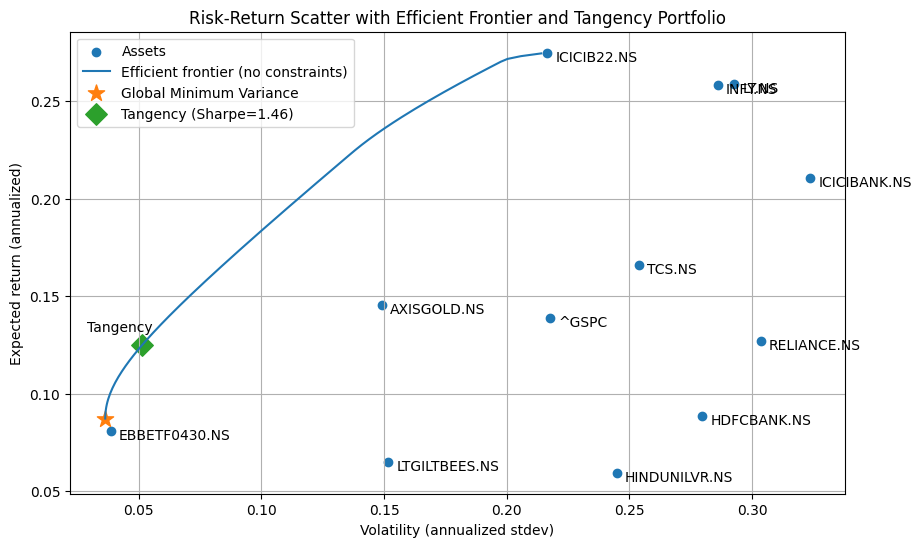

Tangency portfolio (weights):
EBBETF0430.NS    0.6288
AXISGOLD.NS      0.1432
ICICIB22.NS      0.1382
INFY.NS          0.0422
LTGILTBEES.NS    0.0284
^GSPC            0.0193
HINDUNILVR.NS    0.0000
HDFCBANK.NS      0.0000
LT.NS            0.0000
ICICIBANK.NS     0.0000
RELIANCE.NS      0.0000
TCS.NS           0.0000
dtype: float64

Tangency performance (ann):
Return: 0.1250, Volatility: 0.0514, Sharpe: 1.4589
Global Minimum Variance (weights):
EBBETF0430.NS    0.8536
AXISGOLD.NS      0.0541
LTGILTBEES.NS    0.0511
^GSPC            0.0262
ICICIB22.NS      0.0105
TCS.NS           0.0028
HINDUNILVR.NS    0.0017
HDFCBANK.NS      0.0000
LT.NS            0.0000
INFY.NS          0.0000
ICICIBANK.NS     0.0000
RELIANCE.NS      0.0000
dtype: float64

Global Minimum Variance (ann):
Return: 0.0872, Volatility: 0.0363, Sharpe: 1.0241


In [ ]:

# User inputs
#tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "JNJ"]  # change as you like
tickers = [
    "RELIANCE.NS",   # Reliance Industries
    "TCS.NS",        # Tata Consultancy Services
    "INFY.NS",       # Infosys
    "HDFCBANK.NS",   # HDFC Bank
    "ICICIBANK.NS",  # ICICI Bank
    "HINDUNILVR.NS", # Hindustan Unilever
    "LT.NS",         # Larsen & Toubro
    "AXISGOLD.NS",   # Axis Gold ETF
    "^GSPC",         # S&P 500 (international diversification)
    "ICICIB22.NS",   # BHARAT 22 ETF
    "EBBETF0430.NS", # The Bharat Bond ETF
    "LTGILTBEES.NS"
]

start_date = "2018-01-01"
end_date = "2024-12-31"  # change to desired end date
risk_free_rate = 0.05  # annual risk-free rate (e.g., 5%)

# 1) Download adjusted close prices
prices = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)["Adj Close"].dropna()

# 2) Compute expected returns and sample covariance (annualized)
mu = expected_returns.mean_historical_return(prices, frequency=252)  # uses daily by default
S = risk_models.sample_cov(prices, frequency=252)

# 3) Efficient frontier via PyPortfolioOpt
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))  # None/None allows shorting; use (0,1) for long-only
# optional: add objectives or constraints, e.g. L2 regularization
# ef.add_objective(objective_functions.L2_reg, gamma=0.1)

# Compute global minimum variance
w_gmv = ef.min_volatility()

# Instead of ef.reset_weights(), just re-initialize ef
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))

# Compute tangency portfolio (max Sharpe)
w_tang = ef.max_sharpe(risk_free_rate=risk_free_rate)
mu_tang, vol_tang, sharpe_tang = ef.portfolio_performance(risk_free_rate=risk_free_rate)

vol_tang = ef.portfolio_performance(risk_free_rate=risk_free_rate, verbose=False)[1]
sharpe_tang = ef.portfolio_performance(risk_free_rate=risk_free_rate, verbose=False)[2]

# Build the Efficient Frontier curve (for plotting)
# We can use EfficientFrontier utilities to sample points:
ef_plot = EfficientFrontier(mu, S, weight_bounds=(0, 1))
# Build the Efficient Frontier curve manually
ret_vals = np.linspace(mu.min() * 0.8, mu.max() * 1.2, 200)
vols = []
rets = []
weights_list = []

for r in ret_vals:
    try:
        ef_tmp = EfficientFrontier(mu, S, weight_bounds=(0, 1))
        w = ef_tmp.efficient_return(r)
        # Compute portfolio performance manually
        w_vec = np.array(list(w.values()))
        port_ret = w_vec @ mu.values
        port_vol = np.sqrt(w_vec.T @ S.values @ w_vec)
    except Exception:
        continue

    vols.append(port_vol)
    rets.append(port_ret)
    weights_list.append(w)


# Asset points
asset_vols = np.sqrt(np.diag(S))
asset_returns = mu

# 4) Plot: assets scatter, frontier, tangency, GMV
plt.figure(figsize=(10, 6))
plt.scatter(asset_vols, asset_returns, label="Assets")
for i, t in enumerate(asset_returns.index):
    plt.annotate(t, (asset_vols[i], asset_returns[i]), xytext=(6, -6), textcoords='offset points')

plt.plot(vols, rets, label="Efficient frontier (no constraints)")
# GMV
# compute GMV weights explicitly if needed (or reuse earlier result)
# annotate GMV and tangency
# compute portfolio stats for weights
def perf_from_weights(w):
    w = np.array(w)
    port_ret = w.dot(mu)
    port_vol = np.sqrt(w.dot(S).dot(w))
    return port_ret, port_vol

# GMV weights using analytical inverse formula(unconstrained (can be negative weights))
"""
Sigma_inv = np.linalg.inv(S)
ones = np.ones(len(mu))
w_gmv_analytic = Sigma_inv.dot(ones) / (ones.dot(Sigma_inv).dot(ones))
mu_gmv, vol_gmv = perf_from_weights(w_gmv_analytic)
plt.scatter([vol_gmv], [mu_gmv], marker='*', s=150, label='Global Minimum Variance')
"""
# Compute global minimum variance portfolio with constraints
ef_gmv = EfficientFrontier(mu, S, weight_bounds=(0, 1))
w_gmv = ef_gmv.min_volatility()
mu_gmv, vol_gmv, sharpe_gmv = ef_gmv.portfolio_performance(risk_free_rate=risk_free_rate)
w_gmv_array = np.array(list(w_gmv.values()))
mu_gmv, vol_gmv = perf_from_weights(w_gmv_array)

plt.scatter([vol_gmv], [mu_gmv], marker='*', s=150, label='Global Minimum Variance')

# Tangency
w_tang_array = np.array(list(w_tang.values()))
mu_tang, vol_tang = perf_from_weights(w_tang_array)
plt.scatter([vol_tang], [mu_tang], marker='D', s=120, label=f'Tangency (Sharpe={sharpe_tang:.2f})')
plt.annotate("Tangency", (vol_tang, mu_tang), xytext=(-40,10), textcoords='offset points')

# some formatting
plt.xlabel("Volatility (annualized stdev)")
plt.ylabel("Expected return (annualized)")
plt.title("Risk-Return Scatter with Efficient Frontier and Tangency Portfolio")
plt.legend()
plt.grid(True)
plt.show()

# 5) Print portfolios and weights
print("Tangency portfolio (weights):")
print(pd.Series(w_tang).sort_values(ascending=False).round(4))
print("\nTangency performance (ann):")
print(f"Return: {mu_tang:.4f}, Volatility: {vol_tang:.4f}, Sharpe: {sharpe_tang:.4f}")

print("Global Minimum Variance (weights):")
print(pd.Series(w_gmv).sort_values(ascending=False).round(4))
print("\nGlobal Minimum Variance (ann):")
print(f"Return: {mu_gmv:.4f}, Volatility: {vol_gmv:.4f}, Sharpe: {sharpe_gmv:.4f}")

# For printing the analytical method metrics for GMV
#print("\nGlobal minimum variance portfolio (analytic weights):")
#print(pd.Series(w_gmv_analytic, index=mu.index).round(4))
#gmv_ret, gmv_vol = perf_from_weights(w_gmv_analytic)
#print(f"GMV Return: {gmv_ret:.4f}, GMV Vol: {gmv_vol:.4f}")


---

## Efficient Frontier Interpretation

- **Blue curve**: Unconstrained efficient frontier.  
- **Dots**: Individual assets (volatility vs. return).  
- **Star**: Global Minimum Variance (GMV) portfolio.  
- **Diamond**: Tangency (maximum Sharpe) portfolio.  

---

---

## Executive Summary

This report compares two portfolio strategies:  
- **Global Minimum Variance (GMV)** — focus on minimizing volatility.  
- **Tangency Portfolio** — maximize Sharpe ratio (risk-adjusted return).

| Portfolio         | Objective               | Return (ann.) | Volatility (ann.) | Sharpe Ratio | Strategy Analogy   |
|-------------------|-------------------------|---------------|-------------------|--------------|--------------------|
| GMV Portfolio     | Minimize Volatility     | 8.72%         | 3.63%             | 1.02         | Pure Defense 🛡️    |
| Tangency Portfolio| Maximize Sharpe Ratio   | 12.50%        | 5.14%             | 1.45         | Strategic Offense 🚀 |

---

## GMV Portfolio Analysis

- **Objective**: Safest portfolio with lowest volatility.  
- **Dominant assets**:  
  - EBBETF0430.NS (85.4%) → lowest volatility bond ETF.  
  - LTGILTBEES.NS (5.1%) → govt securities ETF.  
- **Diversifiers**:  
  - AXISGOLD.NS (5.4%) → low correlation with equities.  
  - ^GSPC (2.6%) → small exposure to S&P 500 for diversification.  
- **Minimal equity exposure**: TCS.NS, HINDUNILVR.NS at negligible weights.  

✅ **Conclusion**: A fortress of low-volatility debt, with gold + small foreign equity for risk reduction.

---

## Tangency Portfolio Analysis

- **Objective**: Maximize Sharpe ratio.  
- **Debt core reduced to 78.6%**:  
  - EBBETF0430.NS (62.9%) — foundation remains stable.  
- **Equity return boosters (9.4%)**:  
  - ICICIB22.NS (13.82%) → high return, moderate risk.  
  - INFY.NS (4.22%) → strong growth profile.  
- **Gold role enhanced (14.32%)**: AXISGOLD.NS allocation doubled to offset equity volatility.  

✅ **Conclusion**: Strategic reallocation from bonds to equities + gold boosts risk-adjusted return.

---

---

## Next Steps: Rationalizing Weight Bounds

Without constraints, optimizers concentrate heavily in the most efficient assets. To improve diversification:

### 1. Minimum & Maximum Weights
- Example: `weight_i ∈ [0.02, 0.20]`  
- Prevents exclusion of diversifying assets and over-concentration.

### 2. Asset Class Bucketing
- Group assets into **Debt, Equity, Gold**.  
- Apply bounds at **category level** to maintain strategic allocation.

---

## Best Practices for Asset Selection

1. **Focus on correlations**: Assets with low/negative correlation improve diversification.  
2. **Expand asset classes**: Add international equities, REITs, commodities.  
3. **Ensure liquidity**: Avoid illiquid instruments that could distort optimization.  

---

✅ By implementing these practices, portfolios become **more resilient**, reducing concentration risk while maximizing **risk-adjusted returns**.